# 통계분석 프로세스

## 통계

### 개념 설명
- 통계란, 특정집단을 대상으로 수행한 조사나 실험을 통해 나온 결과에 대한 요약된 형태의 표현

### 통계 용어 설명
- 총조사 : 대상 집단 모두를 조사 하는 것
- 표본조사 : 조사하고자 하는 집단의 일부만을 조사 하는 것
    - 모집단 : 연구자가 알고 싶어 하는 대상
    - 모수(Parameter) : 표본 관측에 의해 구하고자 하는 모집단에 대한 정보
    - 표본(Sample) : 연구자가 측정 또는 관찰한 결과들의 집합
    
## 전체 흐름

<img src="img/07-01.png" width="800"/>

## 가설 검정
- 가설검정 : 모집단의 모수를 추정하는 과정
- 새롭게 주장하고자 하는 가설을 대립가설 $H_1$
- 새로운 주장이 타당하지 않았을 때, 현재 믿어지는 가설을 귀무가설 $H_0$

### 양측 검정
- 귀무가설($H_0$) : $\mu = 200$, 대립가설($H_1$) : $\mu \neq 200$

### 단측 검정
- 귀무가설($H_0$) : $\mu > 200$, 대립가설($H_1$) : $\mu \leq 200$

### 가설이 채택되는 과정
- 유의 수준($\alpha$)보다 p-value 작으면 귀무가설 기각

### 기각역과 임곗값(Critical Value)

<img src="img/07-02.png" width="800"/>

- 임곗값은 유의수준과 가설 분포에 따라 달라진다
- 우리가 어떤 검정을 하면, 검정에 따른 분포를 사용, 그 분포의 통계치(T, F, $\chi^2$)를 구한다.
- 통계치가 임곗값 보다 높을 시 귀무가설 기각

# t-test

## t-test 의 개념
- 검정통계량이 귀무가설 하에서 t-분포를 따르는 통계적 가설 검정 방법
- 어느 특정 집단의 평균의 값을 추정하거나 차이를 검정 할 때 사용
- 종속변수는 평균값을 가질 수 있는 연속형 변수, 독립변수는 성별, 종교, 부서 같은 범주형 변수
- 예시
    - A 집단과 B 집단에서 표본을 추출
    - 몸무게의 평균의 차이 비교시 2kg 차이
    - 이 몸무게의 차이로 두 집단간 몸무게 차이가 있다고 할 수 있나?

## 일표본 T-검정(One Sample t-test)
### 개념
- 단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교
- 가정 : 모집단의 구성요소들이 정규분포를 따른다
    - 종속변수는 연속형
    - 검증을 위한 기준값 존재

<img src="img/07-03.png" width="800"/>

### 단계
- 가설 수립

<img src="img/07-04.png" width="800"/>

- 유의수준(a) 설정 : 기본값은 0.05
- 검정통계량의 값 및 p-value 계산
- 귀무가설의 기각여부 판단 및 해석

### 파이썬을 활용한 일표본 t-test
- Shapiro test 함수 설명

<img src="img/07-05.png" width="800"/>

In [1]:
# cats 데이터를 활용한 데이터들의 평균 몸무게가 2.6kg인지 아닌지 검증

import pandas as pd
df = pd.read_csv('./data/cats.csv')
df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [2]:
# Bwt : 고양이의 몸무게, Hwt : 고양이의 길이
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


- 첫번째 값(통계 검증치), 두번째 값(p-value)
- 유의 수준 보다 작음으로, '데이터가 정규분포를 따른다'는 귀무 가설을 기각

In [8]:
# mu = 2.6, shapiro.test

from scipy.stats import stats, wilcoxon
from scipy.stats import shapiro
mu = 2.6
shapiro(df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

- 정규분포를 따르지 않음으로, wilcoxon test로 t-test진행
- p-value가 0.05보다 작아, '고양이의 몸무게가 2.6kg'이다 라는 귀무 가설 기각
- 즉, 유의 수준 0.05 하에서 '고양이의 몸무게는 2.6kg'이다 라고 말할 수 없다.

In [9]:
wilcoxon(df.Bwt - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

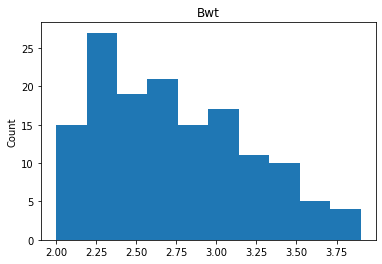

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['Bwt'])
plt.title('Bwt')
plt.ylabel('Count')
plt.show()

## 대응표본 T-검정 (Paired Sample t-test)
### 개념
- 단일모집단에 대해 어떤 처리를 가했을 때
- 처리 전후에 따른 평균의 차이 비교
- 표본 내에 개체들에 대해 두 번의 측정 (같은 집단으로 등분산성 만족)
- 모집단의 관측값이 정규성을 만족 해야한다는 가정이 있다.

<img src="img/07-06.png" width="800"/>

### 단계
- 가설 수립

<img src="img/07-07.png" width="800"/>

- 유의수준(a) 설정 : 기본값은 0.05
- 검정통계량 및 p-value 계산
- 귀무가설의 기각여부 판단 및 해석

### 파이썬을 활용한 대응표본 t-test
- 10명의 환자 대상, 수면영향제 복용 전후 수명시간 측정
- 영양제의 효과 여부를 판단 
- 표본이 정규성을 만족한다는 가정 하에 검정 수행
- 가정을 만족하지 않으면, wilcoxon-test 진행

In [3]:
import pandas as pd
data = {'before':[7,3, 4, 5, 2, 1, 6, 6, 5, 4],
    'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}
df = pd.DataFrame(data)
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


- 가설 수립

<img src="img/07-08.png" width="800"/>


In [17]:
# 대응표본 t-test
stats.ttest_rel(df['after'], df['before'], alternative='greater')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082764)

- p-value = 0.00052 으로 유의 수준 보다 작아 귀무 가설 기각
- 결론 '수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 늘었다' 

In [18]:
df.mean()

before    4.3
after     5.3
dtype: float64

## 독립표본 t-test(Independent Sample t-test)
### 개념 
- 두 개의 독립된 모집단의 평균 비교
- 모집단, 모수, 표본이 모두 두개씩 존재 (등분산 가정)
- 가정
    - 두 모집단이 정규성 만족
    - 두 모집단의 분산이 서로 같아야 (등분산 가정)

<img src="img/07-09.png" width="800"/>

### 단계
- 가설수립

<img src="img/07-10.png" width="800"/>

- 유의수준(a) 설정 : 기본적으로 0.05
- 정규성, 등분산성 가설 검정
- 검정통계량 값 및 p-value 계산
- 귀무가설의 기각 여부 판단 및 해석

### 파이썬을 활용한 독립표본 t-test
- 위의 cats 데이터로 정규성을 따른다는 가정 하에
- 수컷과 암컷 고양이의 몸무게 차이 비교

<img src="img/07-11.png" width="800"/>

- 정규성을 만족한다는 가정 하에, cats 데이터의 등분산성 검정(levene-test) 진행

In [5]:
import pandas as pd

df = pd.read_csv('./data/cats.csv')
female = df.loc[df.Sex == 'F', 'Bwt']
male = df.loc[df.Sex == 'M', 'Bwt']

- 검정 통례량 및 p-value
- p-value가 유의수준 0.05 보다 작음으로
- 귀무가설(암컷과 수컷 고양이의 몸무게의 등분산성을 만족 한다) 을 기각.

In [6]:
from scipy.stats import stats, levene

levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

- 즉, 암컷, 수컷 고양이의 몸무게는 등분산성을 만족하지 않는다. 
- t-test에서 equal_var = False 로 설정

In [22]:
stats.ttest_ind(female, male, equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

- p-value의 값이 유의수준 보다 작음으로 
- 귀무가설(수컷과 암컷의 몸무게 차이는 없다) 기각
- 즉, 수컷과 암컷 몸무게 차이가 존재 한다.

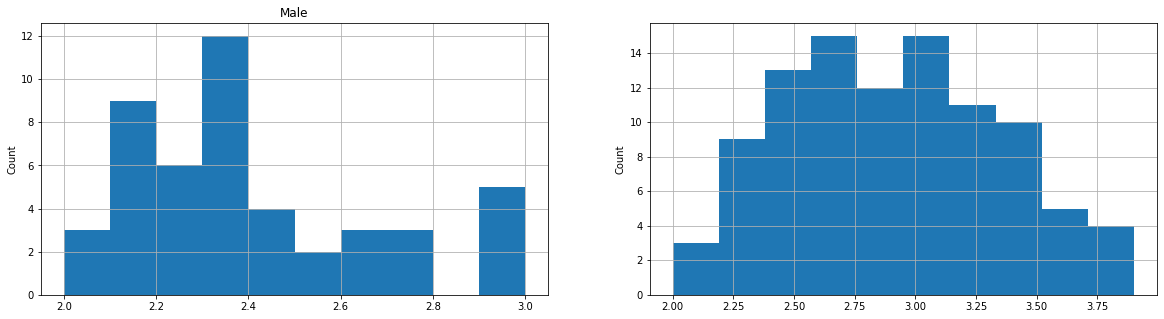

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
female.hist(ax=axes[0])
axes[0].set_title('Female')
axes[0].set_ylabel('Count')
male.hist(ax=axes[1])
axes[0].set_title('Male')
axes[1].set_ylabel('Count')
plt.show()

# 분산분석 (ANOVA)
## 검정의 목적
- T-검정은 두 집단간 평균 차이 비교
- 분산분석은, 두 개 이상의 다수 집단 간 평균 비교
- 독립 변수는 범주형, 종속 변수는 연속형
- e.g. 성별에 따른 키의 차이
- 일원배치, 이원배치, 다원배치 분산분석

## 분산분석의 개념
- 두 개 이상의 그룹에서 그룹 평균 간 차이를 그룹 내 변동에 비교
- 집단 내 분산 보다 다른 집단간의 분산이 더 크다면 유의미

<img src="img/07-12.png" width="800"/>

## 일원배치 분산분석(One-way ANOVA)
### 개념
- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위해 사용 
- 모집단의 수에 제한이 없고, 각 표 본의 수는 같지 않아도 된다
- F 검정 통계량 이용

<img src="img/07-13.png" width="800"/>

- 가설 검정에 사용되는 F 검정 통계량은, 평균의 차이의 계산이 아니라, 분산의 비율값
- 집단 내 분산 보다 집단 간 분산이 크다면 F값은 커지고, 귀무가설을 기각할 확률이 높아진다.

### 가정
- 집단의 측정치는 서로 독립이며, 정규 분포를 따른다
- 집단 측정치의 분산은 같다(등분산 가정)

### 가설
- 귀무가설($H_0$) : k개의 집단 간 모평균에는 차이가 없다. 
- 대립가설($H_1$) : k개의 집단 간 모평균이 모두 같다고 할 수 없다.

### 사후검정
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 검증되었을 경우 (p-value<0.05)
- 어떤 집단들에 대해 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석
- 던칸의 MRT, vltudml LSD, 튜키의 HSD 등

### 단계

<img src="img/07-14.png" width="800"/>

- 가설 수립
- 정규성 검정
- 등분산 검정
- F-oneway ㄱ머정
- 사후 검정

### 파이썬을 활용한 분산분석
- iris dataset, Species 별로 꽃받침의 폭의 평균이 같은지, 차이가 있는지 일원배치 분산분석 시행


In [7]:
import scipy.stats as stats
import pandas as pd 

df = pd.read_csv('./data/iris.csv')
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [9]:
# target 별로 변수에 할당
targets = df['target'].unique()
setosa = df[df['target'] == targets[0]]['sepal width']
versicolor = df[df['target'] == targets[1]]['sepal width']
virginica = df[df['target'] == targets[2]]['sepal width']

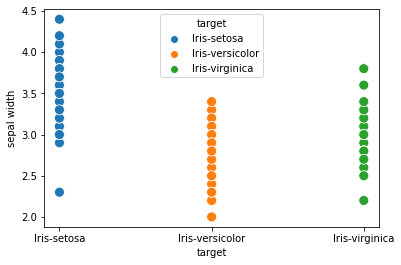

In [10]:
# target 별 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='target', y='sepal width', data=df, hue='target', s=100)
plt.show()

- 시각화 결과, 3 종류의 sepal width 의 평균은 차이가 있어 보인다.
- 다음과 같은 통계정 가설을 세운다
    - 귀무가설($H_0$) : 세 가지 종에 대해 sepal width의 평균은 모두 같다.
    - 대립가설($H_1$) : 적어도 하나의 종에 대한 sepal width의 평균값에는 차이가 있다.

In [11]:
# 각 변수가 정규성을 따르는지 확인 한다.
# 모두 p-value > 0.05로 정규성을 만족 한다. 
# 따라서 등분산성을 확인한다. (만약 하나라도 만족 하지 못하면 kruskal 고려)
print('setosa : ',stats.shapiro(setosa))
print('versicolor : ',stats.shapiro(versicolor))
print('virginica : ',stats.shapiro(virginica))

setosa :  ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
versicolor :  ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
virginica :  ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [8]:
# 등분산성 검정
# p-value > 0.05 로, 등분산성을 만족 한다.
# ANOVA 시행
# 만약 등분산성을 만족 시키지 못했다면, welch_anova 분석을 시행
stats.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [9]:
# p-value < 0.05, 귀무가설 기각
# 세 집단의 분산이 같다고 할 수 없다.
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

- 사후분석에의 가설 
    - 귀무가설: 집단들 사이에 평균이 같다
    - 대립가설: 집단들 사이의 평균은 같지 않다.
- 모든 집단 수준에 대해, 두 집단 씩 짝을 지어 각각 다중 비교

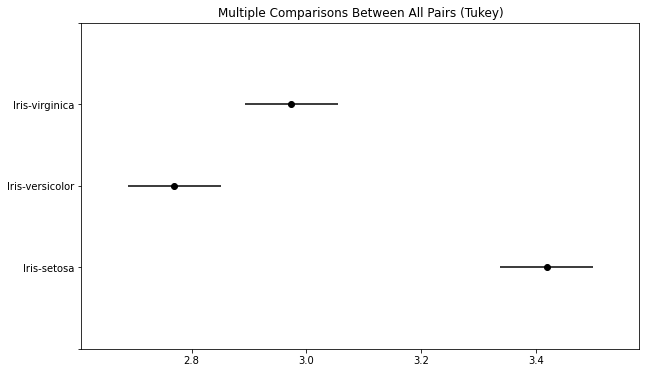

In [10]:
# 사후 검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
mc = MultiComparison(data=df['sepal width'], groups = df['target'])
turkeyhsd = mc.tukeyhsd(alpha=0.05)
fig = turkeyhsd.plot_simultaneous()

- Iris-setosa, Iris-setosa, Iris-versicolor 세 가지 비교에 대해 수행된 p-value(p-adj)가 모두 0.05 보다 작다
- 따라서 귀무 가설 기각
- 모든 종들에 대해 꽃받침 폭의 평균은 통계적으로 유의미한 차이가 있다.
- meandff (오른쪽 집단 - 왼쪽집단)의결과는, Iris-setosa 가 다른 두 집단 보다 더 큰 꽃받침의 폭을 가진다고 해석 할 수 있다.

In [11]:
turkeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


## 이원배치 분산분석 (Two-way ANOVA)

### 개념
- 하나의 종속변수(연속형)에 대한 두 개의 독립변수(범주형) A, B의 영향을 알아 보기 위해 사용
- e.g : 성별과 학년에 따른 시험 점수의 차이
- 두 독립변수 A, B 사이의 상관관계가 있는지 살펴 보는 교효작용(두 독립변수의 범주들의 조합으로 인한 반응변수에 미치는 특별한 영향)에 대한 검증 필요
- F통계량 이용

<img src="img/07-15.png" width="800"/>

### 가정
- 집단의 측정치는 서로 독립이며 정규분포
- 집단 측정치의 분산은 같다(등분산)

### 가설

<img src="img/07-16.png" width="800"/>

- Python으로 양방향 ANOVA 수행 방법

<img src="img/07-17.png" width="800"/>

### 사후검정
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 검증되었을 경우 (p-value<0.05)
- 어떤 집단들에 대해 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석
- 던칸의 MRT, vltudml LSD, 튜키의 HSD 등

### 단계
- 일원 배치 분산분석과 같은 단계
- 독립변수(범주형)의 level이 2개, 가설에 차이가 있음

### 파이썬을 활용한 이원배치 분산분석
- mtcars 데이터 (32개 차종에 대한 다양한 특성과 단위 연료당 주행거리)
- am 변수는 변속기 종류, cyl 변수는 실린더 개수
- am과 cly에 따른 주행거리(mpg) 평균의 유의미한 차이가 있는지 분산분석

In [13]:
import pandas as pd
df = pd.read_csv('./data/mtcars.csv')
df = df[['am', 'cyl', 'mpg']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   am      32 non-null     int64  
 1   cyl     32 non-null     int64  
 2   mpg     32 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


- 종속 변수 mpg는 연속형
- 독립변수 am과 cyl은 범주형

<img src="img/07-18.png" width="800"/>

In [14]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = "mpg ~ C(cyl) + C(am) + C(cyl):C(am)"
model = ols(formula, df).fit()
anova_table = anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl):C(am),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


- cyl 변수와 am 변수 간의 상호작용 효과에 대한 검정결과, p-value (2.686140e-01, 0.268..) > 0.05 로 귀무가설을 기각하지 않는다
    - 즉, 실린더 개수와 변속기 종류간에 교효작용이 존재하지 않는다. 
- cyl 변수에 대한 p-value (9.354735e-07) < 0.05, 귀무가설 기각
    - 즉, 실린더 개수에 따라 주행거리의 평균은 유의미한 차이가 존재 한다.
- am 변수에 대한 p-value (5.608373e-02) > 0.05, 귀무가설 채택
    - 즉, 변속기 종류에 따른 주행거리는 차이가 존재하지 않는다.

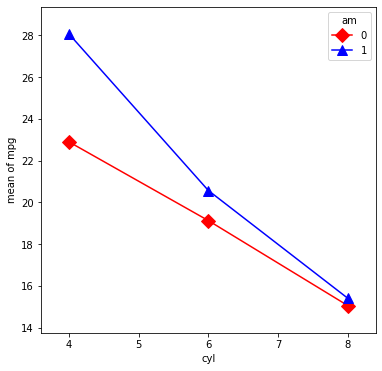

In [15]:
# 교효작용 효과는 그래프를 보고 해석하는 것이 직관적
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
cyl = df['cyl']
am = df['am']
mpg = df['mpg']
flg, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], markers=['D', '^'], ms=10, ax=ax)
plt.show()

- 교효작용이 존재할 경우, 두 직선이 서로 교차, x축에 있는 독립변수와 그래프에서 시각화된 독립변수간에 상호작용이 존재 한다고 해석
- interaction_plot 에 데이터 입력시, x1, x2, y 순으로 

# 교차분석(카이제곱 검정)
## 검정의 목적
- t-test와 ANOVA 분석은 종속변수가 연속형, 독립변수가 범주형
- 카이제곱 검정은, 종속변수가 범주형에 사용
- 각 범주에 따른 결과변수의 분포를 설명하거나
- 범주형 변수가 두개 이상인 경우 두 변수가 상관이 있는지 결정하는 것이 목적

## 교차분석의 개념
- 교차표를 통해 각 셀의 관찰빈도와 기대빈도 간의 차이를 검정
    - 관찰 빈도 : 자료로 부터 얻은 빈도분포
    - 기대 빈도 : 두 변수가 독립일 때 이론적으로 기대할 수 있는 빈도분포

<img src="img/07-19.png" width="800"/>

- 환자군이면서 과체중인 사람의 관찰 빈도는 25명, 기대 빈도는 35*0.4 = 14

## 카이제곱 검정
### 적합성 검정
- 각 범주에 따른 데이터의 빈도분석이 이론적으로 기대하는 분포를 따르는지 검정 하는 것
- e.g. 주사위를 굴렸을 때, 각 주사위의 값이 1/6 확률이 맞는가

#### 파이썬 페키지 설명

<img src="img/07-20.png" width="800"/>

#### 파이썬을 활용한 적합성 검정
- titanic data, sex 변수에 대한 분할표 생성
    - 귀무가설 : 타이타닉호의 생존자 중 남성 비율이 50%, 여성 비율이 50% 이다.
    - 대립가설 : 타이타닉호의 생존자 중 남성의 비율이 50%, 여자의 비율이 50%라고 할 수 없다.


In [16]:
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [17]:
# 생존자만 골라 냄 
df = df[df['survived']==1]
table = df['sex'].value_counts()
table

female    233
male      109
Name: sex, dtype: int64

- 교차 분석을 사용하기 위해, 명목형 변수 sex 변수에 대한 도수분포표를 생성
- 범주별 관찰빈도를 확인 후 적합도 검정

In [19]:
(233+109)/2

171.0

In [3]:
# 유의수준 0.05로 적합도 검정 수행
from scipy.stats import chisquare
chi = chisquare(table, f_exp=[171, 171])
print(f'적합도 검정 : {chi}')

적합도 검정 : Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


- 카이제곱 통계량 : 44.95, p-value : 2.0119672574477235e-11
- 귀무가설 기각, 즉 유의수준 0.05에서 타이타닉호의 생존자 남녀 비율은 50:50 이라고 할 수 없다.

### 독립성 검정
- 모집단이 두 개의 변수 A, B에 의해 범주화 되었을 때, 이 두 변수들 사이의 관계가 독립인지 확인
- e.g. 환자의 비만유무와 대사성 질환의 유무가 주어졌을 때, 비만에 따른 질환 비율 차이가 존재하는가

#### 파이썬 페키지 설명
<img src="img/07-21.png" width="800"/>

- 독립성 검정의 결과

<img src="img/07-22.png" width="800"/>

#### 파이썬을 활용한 독립성 검정
- titanic 데이터의 좌석 등급(class)과 생존여부(survived)가 서로 독립인가.
    - 귀무가설 : class 변수와 survived 변수는 독립이다.
    - 대립가설 : class 변수와 survived 변수는 독립이 아니다.

In [20]:
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
table = pd.crosstab(df['class'], df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [5]:
# 카이제곱 검정을 통한 독립성 검정 수행
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(table)
print(f'Statistic : {chi}')
print(f'p-value : {p}')
print(f'df : {df}')
print(f'Expect : {expect}')

Statistic : 102.88898875696056
p-value : 4.549251711298793e-23
df : 2
Expect : [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


- p-value < 0.05, 귀무가설 기각
- 즉, 좌석 등급과 생존은 유의수준 0.05하에서 독립이라고 할 수 없다.

### 동질성 검정
- 모집단이 임의의 변수에 따라 R개의 속성으로 범주화 되었을 때
- R개의 부분 모집단에서 추출된 C개의 범주화된 집단의 분포가 동일한지 검정
- 독립성 검정과 계산법이 동일
    - 귀무가설 : class의 분포는 survived에 관계 없이 동일
    - 대립가설 : class의 분포는 survived에 관계 없이 동일하지 않다.

# 선형 회귀 분석
- 머신러닝의 선형 회귀 분석은, 예측의 성공 확률을 높이는데 목적
- 전통적 통계 분석에서의 선형 회귀 분석은, 정해진 분포나 가정을 통혜 실패 확률을 줄이고, 원인을 찾는 데 목적이 있다.

<img src="img/07-23.png" width="800"/>

## 회귀분석 개념
- 하나 혹은 그 이상의 원인이 종속변수에 미치는 영향을 추적하여 식으로 표현
- 머신러닝과 다르게, 식으로 표현하여 해석력을 높임
- 변수들 사이의 상관관계를 밝히고 모형을 적합하여 관심 있는 변수를 예측하거나 추론
- 독립변수의 개수가 하나인 경우, 단순 선형 회귀
- 독립변수가 두개 이상인 경우, 다중 선형 회귀

## 단순 선형 회귀분석의 평가
- 잔차의 합이 최소가 되는 최소제곱법 사용
- 하나의 선이 전체 데이터를 얼마나 잘 설명하는가
- 사용되는 평가 지표 : $R^2$ 과 RMSE 

<img src="img/07-24.png" width="800"/>

- SST는 총변동, SSE는 설명된 변동, SSR은 설명되지 않은 변동
    - $R^2 = 1 - \frac{SSR}{SST}$ 
- 총 변동 중에서 설명된 변동의 비율
- 회귀 추정선이 전체 데이터를 얼마나 잘 설명하고 있는가
- RMSE(Root Mean Squared Error) 는 평균 제곱 오차
    - $RMSE = \sqrt{\sum_{i=1}^{n}\frac{(\hat{y}_i-y_i)^2}{m-2}}$

## 다중 선형 회귀분석 평가
- 독립변수가 2개이상 일때 사용
- 독립변수의 수가 늘어나면 $R^2$ 가 증가
- 독립변수의 수에 패널티를 부과하는 $AdjustedR^2$ 사용

## 회귀분석 검토 사항
### 모형이 데이터를 잘 적합하고 있는가?

<img src="img/07-25.png" width="800"/>

### 모형이 통계적으로 유의 한가
- F통계량의 p-value로 가설 선택
    - 귀무가설 : 회귀 모형은 유의하지 않다.
    - 대립가설 : 외귀 모형은 유의 하다.

### 모형은 데이터를 얼마나 잘 설명하는가
- $R^2$ 확인

### 모형의 회귀 계수는 유의한가
- 회귀계수는 각 계수의 독립변수 검정
- t 값의 p-value 확인

### 파이썬 패키지 설명

<img src="img/07-26.png" width="800"/>

- ols의  return 값은 formula 대로  data가 학습된 모델

<img src="img/07-27.png" width="800"/>

### 파이썬을 활용한 단순 선형 회귀 분석
- kc_house_data의 sqft_living(주거공간의 평방 피트)를 독립변수, price를 종속 변수로 설정하여 단순 선형 회귀 분석 실시

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/kc_house_data.csv')
df = df[['price', 'sqft_living']]

# 독립변수와 종속변수간 선형 가정
# 독립변수와 종속 변수간의 선형관계가 0.7
df.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [4]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

X = df['sqft_living']
y = df['price']

# 단순 선형 회귀 모델
lr = ols('price ~ sqft_living', data=df).fit()
y_pred = lr.predict(X)

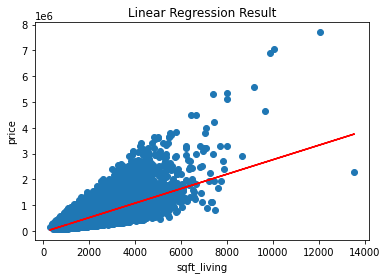

In [5]:
# 시각화
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result')
plt.show()

#### 모형이 데이터를 잘 적합하고 있는가
- 독립변수는 X, 종속 변수는 y에 할당
- 단순 선형 회귀 분석 진행
- return 되는 model의 회귀선을 y_pred에 할당
- 원본 데이터와 회귀선을 시각화하여 데이터의 분포를 보고 회귀선이 적합한지 판단
- 회귀 모형 시각화 결과, 직관적으로 직선이 모든 데이터를 잘 설명하지는 못한다.
- 오차 또한 (0,0)에서 멀어질 수록 분산이 커지는 특성 패턴
- 단순 회귀분석으로는 데이터를 충분히 설명할 수 없는 것으로 보인다.

In [6]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:24:38   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 회귀 모형이 통계적으로 유의한가?
- 귀무가설 : 회귀 모형은 유의하지 않다.
- 대립가설 : 회귀 모형은 유의하다.
- 해당 모델의 F통계량의 p-value로 0 으로 귀무가설 기각, 따라서 유의하다.

#### 모형은 데이터를 얼마나 잘 설명하는가
- $R^2$는 0.493으로 49.3%를 설명
- 모델의 성능은 좋지 않다.

#### 모형 내의 회귀 계수는 유의한가.
- sqft_living의 t 값의 p-value는 0.000으로 유의하다.

## 다중회귀 분석 유의사항
### 다중공선성
- 단순 선형 회귀 분석과 다중 선형 회귀 분석의 차이점은 독립변수의 수
- 독립 변수의 수가 두개 이상일 경우, 필수적으로 다중공선성 문제를 해결 해야
- 다중공선성이란, 독립변수들 간의 강한 상관관계가 나타내는 문제
- 다중공선성의 문제가 존재하면 정확한 회귀계수 추정이 어려움
- 또한 독립변수의 수가 늘 수록 결정계수가 무조건 증가
- 따라서, 변수에 패널티(정규화, Ridge, Lasso) 를 가하여 변수의 영향력을 줄여야 한다
    - 독립변수들 간의 상관계수를 구하여 상관성을 파악 (0.9 이상은 다중공선성 문제가 있다고 판단)
    - 다중공선성 문제가 의심되는 변수들의 회귀분석 허용 오차를 구했을 때, 0.1 이하면 다중공선성이 심각 하다 판단 (허용오차 = $1-R^2$)
    - VIP(Variance Inflacation Factor)의 값이 10 이상이면 다중공선성이 존재할 것으로 예상 (VIP = $\frac{1}{1-R^2}$)

### 변수선택법
- 모형 내 설명변수의 증가는, 데이터 관리에 많은 비용이 발생
- 유의미한 설명변수만 선택하여 최적의 회귀방정식을 도출해야 할 필요
- 변수 선택시의 근거로, F-통계량, AIC, BIC 등 사용    
- 변수 선택법

<img src="img/07-28.png" width="800"/>

## 다중 선형 회귀분석 실습
- 최적의 모델 찾기 위한 변수선택법 진행


In [5]:
from cv2 import dft
import pandas as pd

df = pd.read_csv('./data/Cars93.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [6]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

- 독립 변수 : 'EngineSize', 'RPM', 'Weight', 'Length','MPG.city', 'MPG.highway'
- 종속 변수 : 'Price'

In [8]:
df = df[['EngineSize', 'RPM', 'Weight', 'Length','MPG.city', 'MPG.highway', 'Price']]

In [9]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

df.columns = df.columns.str.replace('.', '')

/tmp/ipykernel_275826/1908290795.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')


In [10]:
model = smf.ols(formula='Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           4.88e-14
Time:                        13:05:59   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adj. R-squared:	0.542, 낮은 결과
- 변수를 모두 사용하여도, 54.2%만 Price를 설명 가능
- 변수간의 상관 관계 확인

In [11]:
df.drop('Price', axis=1).corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


- MPGcity와 MPGhighway가 0.9 이상의 높은 상관성
- VIP 확인

In [14]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=df, return_type='dataframe')

In [15]:
# 독립변수끼리 VIF값 계산

vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])


,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


- MPGcity 를 제거 후에 다시 다중 회귀 분석을 진행 한다.

In [19]:
model = smf.ols(formula='Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.28e-14
Time:                        13:18:01   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Adj. R-squared은 별 차이가 없다.
- MPGhighway의 p-value가 0.900에서 0.282로 현저히 낮아짐
- 다음과 같이 변수선택법을 함수화 하여 진행 한다

In [20]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [21]:
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model


In [22]:
# 단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])


In [23]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f6b7cf1ddc0>
forward
Processed  1 models on 0 predictors in 0.004556179046630859
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f6b7cf1d0d0>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f6b7cf78e20>
forward
Processed  2 models on 1 predictors in 0.0027904510498046875
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f6b7cf78d60>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f6b7cf69940>
forward
Processed  3 models on 2 pr

In [24]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           6.75e-16
Time:                        13:21:56   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 모델 설명
    - ['Weight', 'RPM', 'EngineSize'] 가 선택 됨
    - Adj. R-squared:	0.547
    - 회귀식 : $y = 0.0073*Weight + 0.0071*RPM + 4.3054*EngineSize -51.7933$
    - 회귀식에서 가장 크게 영향을 끼치는 변수는 EngineSize


# 군집분석
- 군집분석 : 각 객체의 유사성을 측정하여, 유사성이 높은 대상집단을 분류하는 통계적 기법
- 요인분석 : 데이터의 유사한 변수를 묶어 다중공선성을 줄이는 목적
- 종속변수가 없어 비지도학습으로 분류

## 개층적 군집분석
### 개념 설명
- 계층적 군집분석은 n개의 군집으로 시작해 점차 군집의 개수를 줄여가는 방법
- 군집의 거리를 계산하는 방법에 따라 사용하는 연결법이 달라짐

### 종류

<img src="img/07-29-01.png" width="800"/>
<br>
<img src="img/07-29-02.png" width="800"/>

### 계측적 군집분석 파이썬 함수 설명

#### linkage

<img src="img/07-30.png" width="800"/>

<img src="img/07-31.png" width="800"/>

#### dendrogram

<img src="img/07-32.png" width="800"/>

<img src="img/07-33.png" width="800"/>

#### fcluster

<img src="img/07-34.png" width="800"/>

<img src="img/07-35.png" width="800"/>

### 계층적 군집분석 실습
- USArrests 데이터, 최단, 최장, 와드 연결법 사용
- 1973년 미국 50개 주에서 폭행, 살인 및 강간으로 체포된 인구 100,000명 당 통계
- 4개의 변수에 대한 50개의 관측값
    - Muder : 살인 체포
    - Assault : 폭행 체포
    - UrbanPop : 도시 인구 비율
    - Rape : 강간 체포

In [3]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data/USArrests.csv')
df.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
lablelist = df.State.tolist()
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
# 최단 연결법
single = linkage(df.iloc[:, 1:], metric='euclidean', method='single')

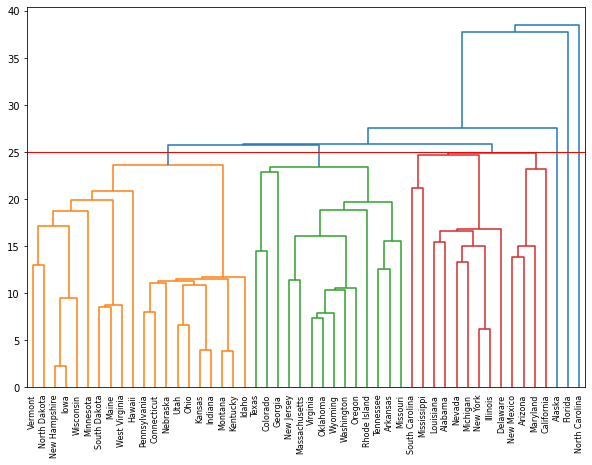

In [11]:
# 덴드로 그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(single, orientation='top', labels=lablelist,
          distance_sort='descending', color_threshold=25,
          show_leaf_counts=True)

plt.axhline(y=25, color='r', linewidth=1)
plt.show()

- t값의 기준을 25로 군집화를 시켰을 때, 6개의 군집이 생긴다고 예상
- 최단 연결법은 군집이 가지고 있는 객체의 수가 비슷하지 않아 군집 해석에 어려움이 있음

In [12]:
# 와드 연결법
ward = linkage(df.iloc[:, 1:], metric='euclidean', method='ward')

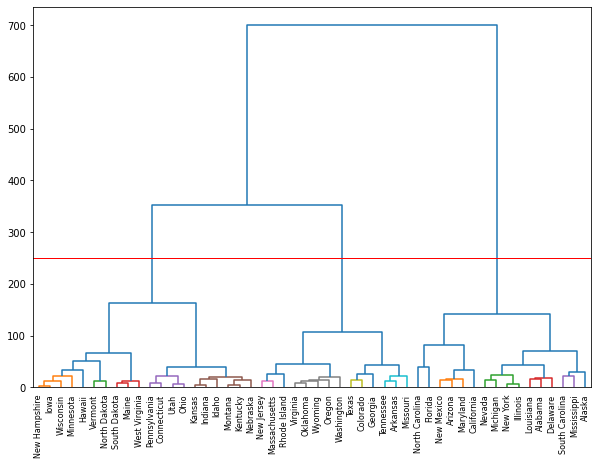

In [13]:
# 덴드로 그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(ward, orientation='top', labels=lablelist,
          distance_sort='descending', color_threshold=25,
          show_leaf_counts=True)

plt.axhline(y=250, color='r', linewidth=1)
plt.show()

- t 값을 250으로 설정하면, 3개의 군집으로 나누어짐
- 각 군집의 수가 비슷하여 적절하게 보임, 해석이 용이함
- 와드 연결법으로 적절한 t (250)을 찾았으면, fcluster 함수로 이를 적용하여 
- 각 객체들이 가진 군집 번호를 데이터화

In [14]:
# state마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [15]:
df['cluster'] = assignments
df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


## 비계층적 군집분석
- 랜덤하게 군집을 묶어 나가는 알고리즘
- K-means, DBSCAN, 혼합분포 등이 있음

### K-means

<img src="img/07-36.png" width="400"/>

#### 개념
- 속성의 개수가 적은 단순한 데이터에 활용
- 주어진 데이터를 K 개의 클러스터로 군집화
- 각 클러스터와의 거리 차이의 분산을 최소화 하는 방식

#### 표준 알고리즘

<img src="img/07-37.png" width="400"/>

##### 초깃값 설정
- k는 하이퍼파라미터
- 임의의 k개의 데이터를 각 클러스터의 중심으로 설정

<img src="img/07-38.png" width="400"/>

##### 클러스터 설정
- 각 데이터로 부터 각 클러스터들의 중심까지의 거리 계산
- 해당 데이터에서 가장 가까운 클러스터를 찾아 데이터 배당

<img src="img/07-39.png" width="400"/>

##### 클러스터의 중심 재조정
- $\mu_i$를 각 클러스터에 있는 데이터들의 무게 중심으로 재설정

<img src="img/07-40.png" width="400"/>

- 위 단계를 반복하여, 변화가 없을 때 까지 진행

#### 특정
- 알고리즘이 쉽고 간결
- 변수가 많을 경우 군집화 정확도 낮아짐 (차원축소 진행)
- 군집의 수 K를 사용자가 알아서 설정해야

#### 최적의 군집 개수 판단법
##### 콜린스키 하라바츠 스코어 방법
- 모든 클러스터에 대한 클러스터 간 분산과 클러스터 내 분산의 합의 비율
- 점수가 높을 수록 높은 성능
##### 엘보우 방법
- 클러스터 내 오차제곱합을 클러스터 개수마다 비교
- 반복문을 통해 클러스터의 개수(k)를 늘려가며 계산한 오차제곱합 비교
- 어느 숭간 오차제곱합이 급격히 줄어드는 부분, 기울기가 소실되는 구간을 elbow 로 판단
- 이곳을 최적의 클러스터 개수로 판단

#### 파이썬을 이용한 K-means 알고리즘 구현
- iris 데이터의 target을 사용하지 않고 군집화

In [16]:
import pandas as pd
from sklearn.cluster import KMeans

iris = pd.read_csv('./data/iris.csv')
X = iris.drop('target', axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 하라바츠 스코어와 엘보우기법으로 적절한 K를 찾는다

In [20]:
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print(k, calinski_harabasz_score(X, labels))

2 513.3038433517568
3 560.3999242466402
4 529.1207190840455
5 494.0943819140986
6 474.51742958716295
7 448.8714494416451
8 436.61302488142496
9 414.5303174051382


- k 값이 3일 때 가장 높은 값을 가진다.
- 따라서 K = 3으로 설정
- 다음은 엘보우 기법에 대한 구현

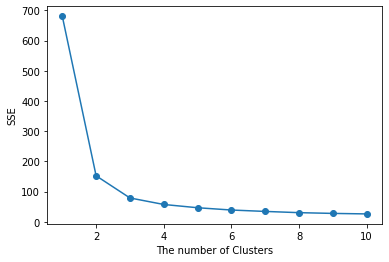

k : 1, sse : 680.8244
k : 2, sse : 152.36870647733906
k : 3, sse : 78.94084142614601
k : 4, sse : 57.34540931571816
k : 5, sse : 46.53558205128206
k : 6, sse : 38.95701115711986
k : 7, sse : 34.32652991452991
k : 8, sse : 30.227724598930486
k : 9, sse : 27.766706937799047
k : 10, sse : 26.07225182334006


In [24]:
import matplotlib.pyplot as plt
def elbow(X):
    sse=[]
    K = []
    for k in range(1, 11):
        km = KMeans(n_clusters=k, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        K.append(k)
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    return K, sse
    
K, SSE = elbow(X)
for k, sse in zip(K, SSE):
    print(f'k : {k}, sse : {sse}')

- k 가 sse가 평평해지는 4 이전 2 혹은 3이 적당해 보임

In [25]:
# 최적의 k로 K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [26]:
# 할당된 군집을 iris 데이터에 추가
new_labels = km.labels_
iris['cluster'] = new_labels
iris.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


- 시각화

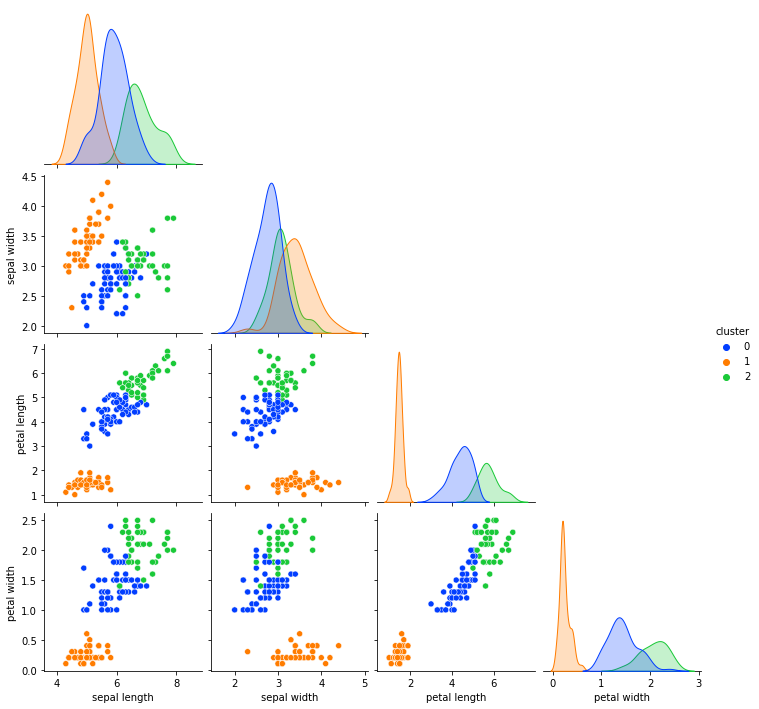

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris, diag_kind='kde', hue='cluster', 
             corner=True, palette='bright')
plt.show()

- 3개의 군집으로 잘 나뉘어 있음

In [29]:
# 원본 데이터의 target 으로 시각화

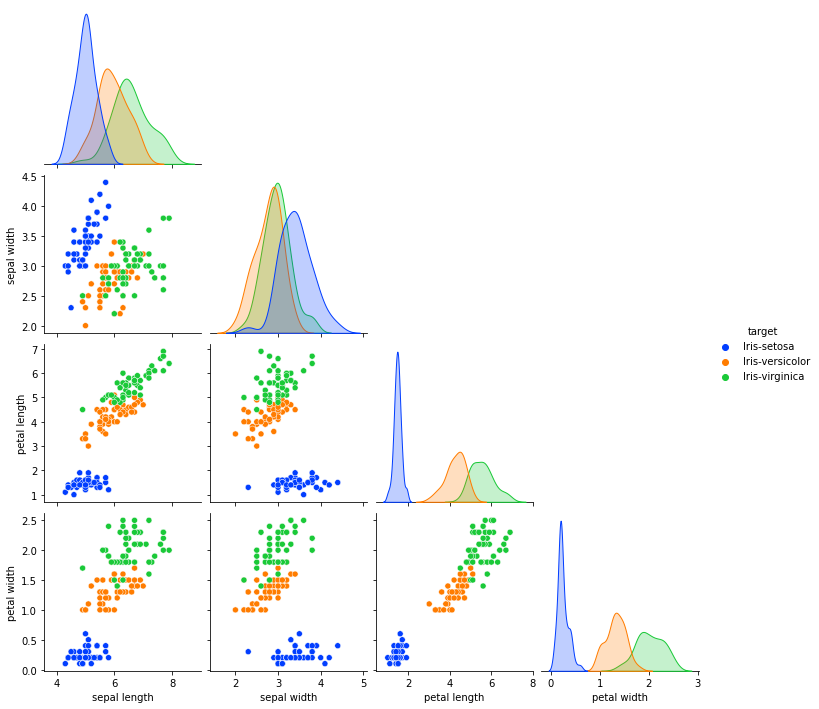

In [31]:
sns.pairplot(iris.drop(columns=['cluster']), diag_kind='kde', hue='target', 
             corner=True, palette='bright')
plt.show()

### 혼합분포 군집 분석
- k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로 나왔다는 가정
- k개의 각 모형은 군집이며, 각 데이터는 추정된 k개의 모형 중 어느 모형에서 나왔을 확률이 높은지에 따라 군집 분류

#### 사용 이유
- 실행활 데이터를 적용시키기위해 발전된 모델
- K-means는 원형으로 군집화된 데이터에 적합, 밀도기반인 DBSCAN은 반달형태의 데이터에 잘 적합됨
- 실행활 데이터는 원형, 반달형태등과 다름

#### 장점

<img src="img/07-41.png" width="800"/>

#### 사용 알고리즘 : EM(Expectation-Maximization)
- 각 자료에 대해 Z의 조건부분포로부터 조건부 기댓값을 구할 수 있다.
- Z의 조건부 분포 : 어느 집단에 속할지에 대한 확률 분포
    - 관측변수 X와 잠재변수 Z를 포함하는 (X, Z)에 대한 로그-가능도 함수에 대해 Z대신 상수값인 Z의 조건부 기대값을 대입
    - 로그-가능도 함수를 최대로 하는 모수를 쉽게 찾을 수 있다.
    - 이 추정과정을, '최대가능도추정' 이라고 한다
- EM 알고리즘의 4단계
    - 초깃값 설정 : 필요한 모수에 대해 초깃값 선정
    - E : 잠재변수 Z의 기대치 계산 (X가 특정 집단에 속할 확률)
    - M : 잠재변수 Z의 기대치를 이용해 파라미터 추정(계산된 확률을 통해 모수를 재추정)
    - 반복 정지 : 수렴조건이 만족될 때까지 E와 M 반복
    - 수렴조건 : 최대가능도(Likelihood)가 최대인가?
    
#### 파이썬을 활용한 혼합분포 군집 분석
```python
class sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
```
##### 주요 매개 변수

<img src="img/07-42.png" width="800"/>

- iris 데이터로 혼합분포 군집분석
- 정규분포 기반으로, StandardScaler 적요 필요

In [36]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

iris = pd.read_csv('./data/iris.csv')
df = iris.drop('target', axis=1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 가우시한 혼합 모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
df['gmm_cluster'] = gmm_labels
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.904444,2.775556,4.193333,1.293333
2,6.554545,2.950909,5.489091,1.989091


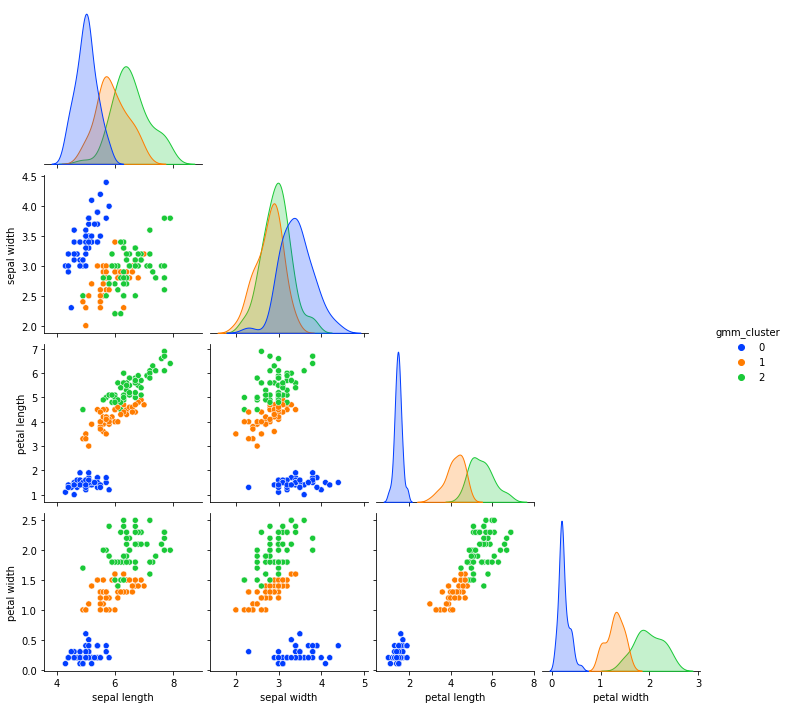

In [38]:
# 군집결과 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, diag_kind='kde', hue='gmm_cluster', corner=True, palette='bright')
plt.show()

# 연관분석
- 사건의 연관규칙을 찾는 방법
- 보통 A후에 B라는 사건을 시행 할 확률, 구매 패턴 분석에 사용 (장바구니 분석)
- OTT서비스의 추천 컨텐츠 등에 사용
- 지지도, 신뢰도, 향상도

## Run-Test
### 개념
- 연관규칙을 찾기 전, 연속적인 binary 관측 값들이 임의적으로 나타난 값인지 임의적이 아닌지 검정하는 것
- 가설
    - 귀무가설 : 연속적인 관측값이 임의적이다
    - 대립가설 : 연속적인 관측값이 임의적이지 않다 (즉, 연관성이 있다)
    
### 파이썬 패키지 설명
#### runstest_1samp 함수

<img src="img/07-43.png" width="800"/>

#### 매개변수

<img src="img/07-44.png" width="800"/>

#### return 값

<img src="img/07-45.png" width="800"/>

### 파이썬을 이용한 연관규칙 검정 실습

- 상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 한다.
- ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
- 두 상품의 구매 패턴이 연관성이 있는지 검정하라.

In [40]:
import pandas as pd
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [42]:
from statsmodels.sandbox.stats.runs import runstest_1samp

# Run-Test를 위한 데이터 변환
test_df.loc[test_df['product'] == 'a', 'product'] = 1
test_df.loc[test_df['product'] == 'b', 'product'] = 0

# Perform Runs test
runstest_1samp(test_df['product'], cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

- 0.05 유의수준에서 p-value가 0.05 보다 크므로, 귀무가설 기각
- 즉 상품 a와 b의 구매는 임의적이지 않다.

## 연관규칙분석 (Association Analysis)
- 효율적인 상품의 진열이나 패키지 상품개발, 교차판매 전략, 기획상품의 결정 등
- 실제 고객의 데이터를 분석하는데 사용

### 개념
- 서로 다른 두 아이템 집합이 얼마나 빈번하게 발생하는가 관찰
- 장바구니 분석 : 장바구니에 무엇이 같이 들어갈 것인지 분석
- 서열분석 : A를 산 다음 B를 살 것이다.

### 연관규칙분석에 사용되는 척도
- 지지도(Support) : 전체 거래 중 항목 A와 B를 동시에 포함하는 거래의 비율 ($P(A \cap B)$)
- 신뢰도(Confidence) : 항목 A를 포함한 거래 중 항목 A와 항목 B가 같이 포함될 확률 ($P(A \cap B)/P(A)$)
- 향상도(Lift) : A가 구매되지 않았을 때 품목 B의 구매 확률에 비해 A가 구매되었을 때 품목 B의 구매 확률의 증가비 ($P(B|A) / P(B) = P(A \cap B)/P(A)P(B)$)

### Apriori 알고리즘
- 가능한 모든 경우의 수를 탐색하여 지지도, 신뢰도, 향상도가 높은 규칙을 찾아내는 방식
- 아이템의 수가 증가할 수록 계산 소요 리소스가 기하급수적으로 늘어남
- 아이템이 n개 일 때 탐색해야 할 모든 경우의 수 : $n*(n-1)$
- 최소 지지도 이상의 빈발집합 만을 고려하여 연관규칙을 생성하는 Apriori Algorithm 이 제안 됨
    - 장점 : 1세대 알고리즘으로 구현과 이해가 쉽다
    - 단점 : 지지도가 낮은 후보 집합을 생성 시 아이템의 개수가 많아지면 계산복잡도 증가
    
### 파이썬을 활용한 연관규칙분석
#### mlxtend의 apriori 함수
- One-hot 형식의 DataFrame에서 빈번항목집단을 출력
```python
    from mlxtend.frequent_patterns import apriori
```

<img src="img/07-46.png" width="800"/>

#### mlxtend의 association_rules 함수
- score, confidence, lift 를 포함하는 연관 규칙의 Dataframe 생성
```python
    from mlxtend.frequent_patterns import association_rules
    association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)
```

<img src="img/07-47.png" width="800"/>

#### 파이썬을 활용한 연관규칙 분석 실습
- TrnasactionEncoder를 통한 data set의 변형 필요
- 원본 데이터의 unique 값을 컬럼으로 지정하고, 이를 True(구매), False(비구매)로 변환

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [3]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [4]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


- 최소 지지도가 0.6 이상인 품목만 추출

In [5]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


- 최소 지지도가 0.3 이상인 규칙만 추출

In [6]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))
frequent_itemsets

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Beer, Apple)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Beer, Rice)",2


#### groceries dataset의 연관규칙 분석 실행
- groceries dataset은 구매 내역이 저장되어 있는 데이터, 트랜잭션 형태로 전처리 필요

In [8]:
df = pd.read_csv('./data/groceries.csv', header=None)
df.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


- 각 행을 콤마로 구분하여, 리스트로 만들어 준다.

In [12]:
groceries = []
for i, row in df.iterrows():
    groceries.append(row[0].split(','))
groceries

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

- 트랜젝션 형태로 변형

In [16]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
te = TransactionEncoder()
te.fit(groceries)
groceries_tr = pd.DataFrame(te.transform(groceries), columns=te.columns_)
groceries_tr

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- 지지도 1% 이상인 빈번학목집합 탐색

In [28]:
from mlxtend.frequent_patterns import apriori

groceries_ap = apriori(groceries_tr, min_support = 0.01, use_colnames=True)
groceries_ap

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(tropical fruit, root vegetables, whole milk)"
329,0.014540,"(yogurt, root vegetables, whole milk)"
330,0.010473,"(yogurt, whole milk, soda)"
331,0.015150,"(tropical fruit, yogurt, whole milk)"


- association_rules 함수로 한번에 많은 규칙 파악 가능

In [29]:
from mlxtend.frequent_patterns import association_rules
association_rules(groceries_ap, metric='confidence', min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
3,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
...,...,...,...,...,...,...,...,...,...
455,(yogurt),"(tropical fruit, whole milk)",0.139502,0.042298,0.015150,0.108601,2.567516,0.009249,1.074380
456,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
457,"(whipped/sour cream, whole milk)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943
458,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033


- 규칙의 길이가 2 이상, 신뢰도가 0.4 이상, 향상도가 3이상인 규칙

In [32]:
rules = association_rules(groceries_ap, metric='lift', min_threshold=1)
rules['antecedent_len'] = rules['antecedents'].apply(lambda x : len(x))
rules[(rules['antecedent_len']>=2) &(rules['confidence'] >=0.4)&(rules['lift']>=3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
419,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2
490,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2


# 시계열 분석
- 자주 출제 되는 분야
- 시계열분석 + 군집분석 의 혼합형 문제도 나옴
- 해당 분석의 과정과 의의를 이해하는지도 물어 보고 있음
- ARIMA 모형에 대한 상세 설명
- 시계열 분석이란, 시간의 흐름에 따라 기록된 데이터를 바탕으로 미래의 변화에 대한 추세를 분석하는 방법
- 시간에 따라 데이터의 추세가 어떠한지 시간 외에 어떤한 외부요인이 데이터에 영향을 미치는지 나누어 생각할 수 있어야 한다.

## 시계열 분해
- 추세(Trend), 계절성(Seasonality), 잔차(Residual)로 분해
- 시간의 요인은, 추세, 계절성, 외부요인은, 잔차(불규칙) 요인

### 모형 판단
- 시계열의 주기적 반복/계절성이 있는지에 따라 Additive 모형과 Multiplicative 모형 중 어느쪽이 적합 한지 판단
- Additive 모형 : 추세와 계절성이 별개로 존재
- Multiplicative 모형 : 추세에 따라 계절성이 있는 경우'

<img src="img/07-48.png" width="800"/>

### 파이썬을 활용한 시계열 분해

In [45]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/arima_data.csv', names=['day', 'price'])
df.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [47]:
df['day'] = pd.to_datetime(df['day'])
df.set_index('day', inplace=True)
df.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


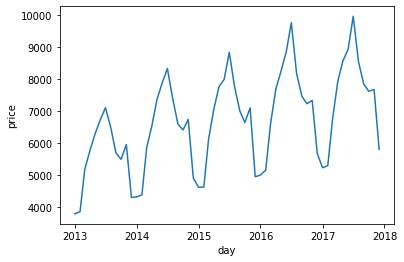

In [50]:
import matplotlib.pyplot as plt

plt.plot(df)
plt.xlabel('day')
plt.ylabel('price')
plt.show()

- 추세에 따라 계절성 존재 -> multiplicative 
- Trend와 Seasonal 이 명확히 존재
- 뷸규칙 요인은 거의 없음

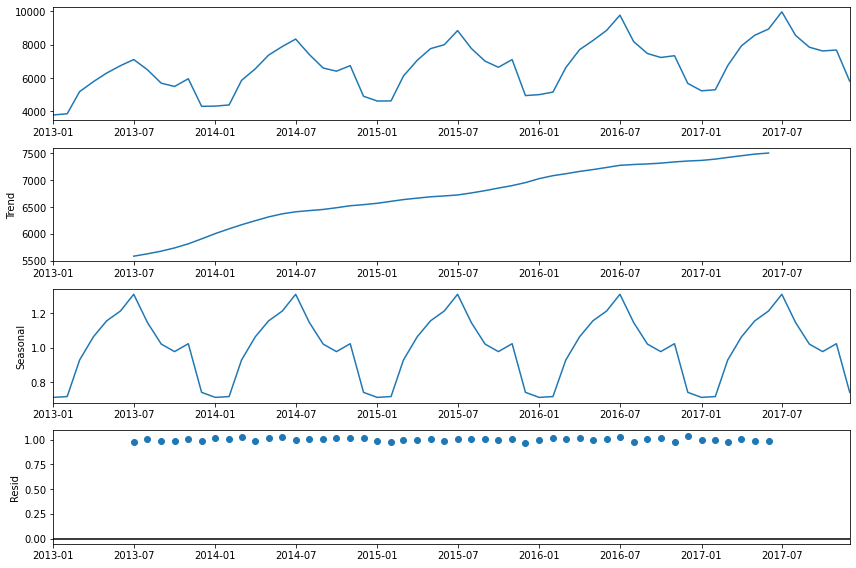

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [12, 8]
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

## 정상성 변환
- 시험에서는 ARIMA 모델을 사용하는 것을 추천
- 성능 + 해석력이 좋기 때문
- ARIMA는 AR(Auto-Regression) 모형과 MA(Moving Average) 모형을 합친 모형

### 정상성의 개념
- 평균, 분산이 시간에 따라 일정한 성질을 가지고 있다는 것
- 시계열 데이터의 특성이 시간의 흐름에 따라 변하지 않는 상태
- 추세, 계절정이 있는 시계열은 정상 시계열이 아니다.
- 비정상 시계열의 경우 ARIMA 모형을 적용시킬 수 없으므로 비정상 시계열을 정상 시계열로 변화 해주어야 한다.
- 변환 방법으로는, 로그 변환과 차분이 있다.

### 로그 변환

<img src="img/07-49.png" width="800"/>

- 로그변환은 위의 왼쪽과 같이 분산(변동폭)이 일정하지 않은 경우에 사용

### 차분

<img src="img/07-50.png" width="800"/>

- 로그변환 후, 추세 계절성이 존재하는 경우 추세와 계절성을 없애기 위해 사용

### 파이썬을 활용한 데이터 전처리
- 정상성 검정을 위해 Augmented Dickey-Fuller (ADF) Test를 수행 한다.

- ADF test 가설
    - 귀무가설 : 데이터가 정상성을 갖지 않는다.
    - 대립가설 : 데이터가 정상성을 갖는다.

- adfuller 함수
```python
    adfuller(x, maxlag, regression, autolag)
```

- 주요 매개 변수

<img src="img/07-51.png" width="800"/>

- return 값
    - t-statistic : 해당 테스트는 t-통계량 사용
    - p-value : 유의수준 보다 작으면 귀무가설 기각
    
- 앞선 예제의 데이터를 train, test로 분리 한 후, 정상성 검정    

In [5]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd 

df = pd.read_csv('./data/arima_data.csv', names=['day', 'price'])
df['day'] = pd.to_datetime(df['day'])
df.set_index('day', inplace=True)
training = df[:'2016-12-01']
test = df.drop(training.index)

In [6]:
adf = adfuller(training, regression='ct')
print(f'ADF Statistic : {adf[0]}')
print(f'p-value : {adf[1]}')

ADF Statistic : -1.9997199341327594
p-value : 0.601586330379429


- 우상향 트랜드, ct (상수항 1차 추세) 사용
- p-value > 0.05, 귀무가설(정상성을 갖지 않는다) 채택
- 1차 차분 혹은 로그변환 수행 필요

<AxesSubplot:xlabel='day'>

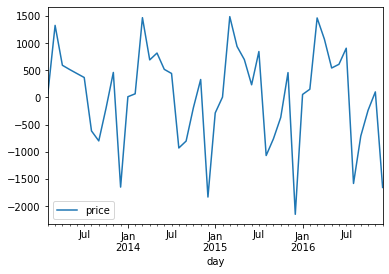

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_df = training.diff(1).dropna()
diff_df.plot()

In [8]:
adf = adfuller(diff_df, regression='c')
print(f'ADF Statistic : {adf[0]}')
print(f'p-value : {adf[1]}')

ADF Statistic : -12.094547576926397
p-value : 2.085160639961322e-22


- 우상향 패턴을 보이지 않아 adfuller 함수의 regression은 'c' (상수항) 을 사용
- p-value는 0.05보다 작아, 귀무가설 기각, 정상 시계열로 변환 되었음
- 이제 AR과 MA 모형을 적용 해보자

## AR 모형과 MA 모형
### AR(Auto Regressive)
#### 개념
- AR 모형은 자기회귀모형이란 뜻으로, 현 시점의 데이터를 이전 데이터들의 상관성으로 나타내는 모형
- 과거의 값이 현재의 값에 얼마나 영향을 미쳤는지 파악하는 것
- 만약 과거의 값이 현재의 값에 영향을 미치지 않는다면, 해당 모형의 성능은 낮아 진다.
- 이때 최적의 성능을 가지는 모델을 만들 수 있는 과거값을 찾게 되는데, 이 값을 p라고 하며 AR(p) 모형이라 한다.
#### ACF(Auto Correlation Fuction)
- ACF는 자기 상관 함수로, 이 값은 시차가 다른 자기상관성을 의미
- ACF값을 시차에 따른 그래프로 시각화 해보면, 최적의 p를 찾을 수 있다.
- 비정상 시계열의 경우 ACF 값은 느리게 0에 접근하며 양수의 값을 가질 수 있다.
    - 비정상 시계열은, 추세나 계절성을 갖고 있어, 가장 최근의 값이 상관성이 크고, 과거 값은 상대적으로 상관성이 낮을 것. 따라서 느리게 0에 수렴
- 정상 시계열의 경우 ACF 값은 빠르게 0으로 수렴하며, 0으로 수렴할 때가 시차 p 값으로 설정
#### 파이썬을 활용한 AR 모형의 p 값 찾기

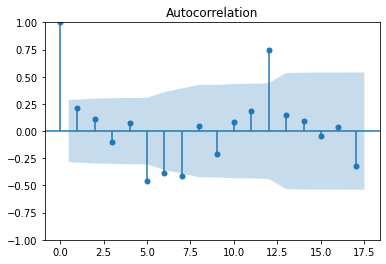

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(diff_df);

- acf에서 2차 이후 0에 수렴, 따라서 AR 모형의 최적의 p값은 2로 설정

### MA(Moving Average)
#### 개념
- MA 모형은 과거의 예측 오차들의 가중이동평균으로 현재 시점의 데이터를 포현하는 모형
- 과거의 예측 오차를 이용해 미래를 예측하는 모형
- 과거의 예측 오차들에 따라 가중이동평균이 달라짐
- 최적의 모형이 되는 구간을 구하는 것이 중요
- MA 모형이 최적이 되게끔 하는 변수 값이 q이며, 이를 모형 MA(q) 모형이라고 한다.
#### PACF(Partial Auto Correlation Fuction)
- PACF는 편자기상관 함수
- PACF는 ACF와는 다르게 시차가 다른 두 시계열 데이터 간의 순수 한 상호 연관성을 나타낸다.
- ACF는 과거 시점 까지의 데이터로 현시점의 상관성, PACF는 과거의 특정한 한 시점의 데이터와 현재 시점의 데이터의 상관성
- PACF 값이 0에 수렴할 때 q 값을 MA 모형의 q 값으로 설정
#### 파이썬을 활용한 AR 모형의 q값 찾기

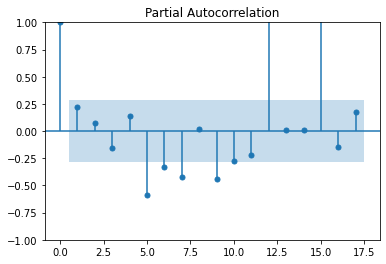

In [10]:
import warnings
warnings.filterwarnings('ignore')

plot_pacf(diff_df)
plt.show()

- 시차 2 이후 0에 수렴, 따라서 MA(2) 모형 임

## ARIMA(Auto-Regressive Intergrated Moving Average)
### 개념
- ARIMA는 비정상적 시계열 자료에 대해 분석하는 모형
- 차분을 이용해 비정상 시계열을 정상으로 만든다
- 그리고 AR, MA 두 모형을 결합하여, 과거 시점의 데이터로 현재 혹은 미래의 시점의 데이터를 예측
- ARIMA 모형의 파라미터로는 (p, d, q) 사용
- 시계열 자로 외에 다른 자료가 없을 때, 그 변동 상태를 확인할 수 있다는 장점을 갖고 있으며
- 어떠한 시계열에도 적용이 가능한 모델

### ARIMA 파이썬 실습
- p는 ACF로, d는 차분의 횟수, q는 PACF로 최적화 가능
- AIC 값을 비교하여 최적의 모델을 찾는 방법도 있음

#### ARIMA 함수 호출
``` python
    from statsmodels.tsa.arima.model import ARIMA
```
#### 주요 매개변수

<img src="img/07-52.png" width="800"/>


#### 파이썬 실습
- ARIMA 모델에 p,d,q (2,1,2)를 적용하여 예측해 보자

In [44]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd 

df = pd.read_csv('./data/arima_data.csv', names=['day', 'price'])
df['day'] = pd.to_datetime(df['day'])
df.set_index('day', inplace=True)
training = df[:'2016-12-01']
test = df.drop(training.index)

<AxesSubplot:xlabel='day'>

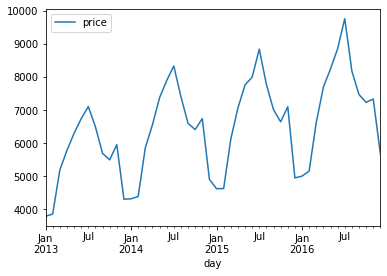

In [45]:
training.plot()

<AxesSubplot:xlabel='day'>

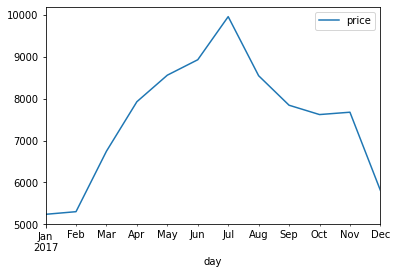

In [46]:
test.plot()

In [22]:
model = ARIMA(training, order=(2,0,2), trend='ct')
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -380.820
Date:                Sat, 05 Nov 2022   AIC                            775.640
Time:                        09:08:28   BIC                            788.739
Sample:                    01-01-2013   HQIC                           780.590
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5282.6644    703.534      7.509      0.000    3903.764    6661.565
x1            45.1576     23.302      1.938      0.053      -0.514      90.829
ar.L1         -0.4788      0.167     -2.860      0.004      -0.807      -0.151
ar.L2          0.5170      0.170      3.041      0.002       0.184       0.850
ma.L1          1.9559      0.211      9.269      0.000       1.542       2.369
ma.L2          0.9848      0.213      4.619      0.000       0.567       1.403
sigma2      3.848e+05      0.136   2.83e+06      0.000    3.85e+05    3.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.75   Prob(JB):                         0.48
Heteroskedasticity (H):               1.37   Skew:                            -0.43
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.41e+23. Standard errors may be unstable.
"""

- AIC는 작을 수록 좋다.
- AR, MA 모델의 p-value가 0.05 이하인지 확인 한다.

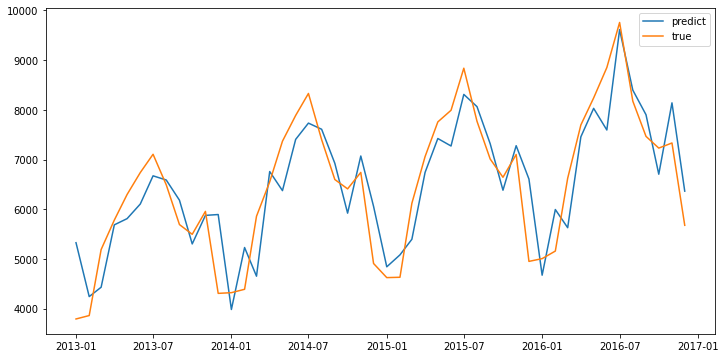

In [26]:
plt.figure(figsize=(12,6))
plt.plot(res.predict(), label='predict')
plt.plot(training, label='true')
plt.legend()
plt.show()

- 실제 값과 예측 값의 비교, 과소적합은 의심되지 않는다.
- 이 모델로 2017년의 데이터를 예측해 보자.
- 예측에는 predict() 보다 forecast() 를 주로 사용한다.

In [28]:
forecast = res.forecast(steps=len(test), alpha=0.05)
forecast

2017-01-01    6212.700071
2017-02-01    6582.000354
2017-03-01    7381.531368
2017-04-01    7233.082194
2017-05-01    7760.914604
2017-06-01    7474.892446
2017-07-01    7928.134194
2017-08-01    7606.704524
2017-09-01    8038.338152
2017-10-01    7708.949664
2017-11-01    8133.223252
2017-12-01    7803.244181
Freq: MS, Name: predicted_mean, dtype: float64

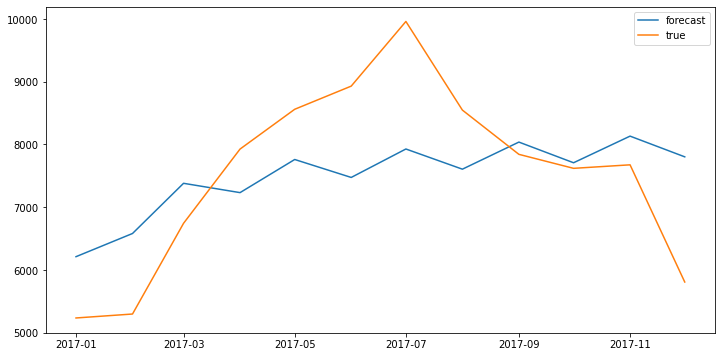

In [30]:
plt.figure(figsize=(12,6))
plt.plot(forecast, label='forecast')
plt.plot(test, label='true')
plt.legend()
plt.show()

- 그래프를 보면 예측이 성공적이지 않다.
- $R^2$와 RMSE도 확인해 본다

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(test, forecast)
rmse = mean_squared_error(test, forecast)**0.5
print(f'r2_score : {r2}, RMSE : {rmse}')

r2_score : 0.356239503120801, RMSE : 1136.226340284618


- 계절정 지수가 추가된 경우, ARIMA 보다 SARIMA 를 사용하는 것이 좋다.

## SARIMA
### 개념
- 데이터가 지닌 계절성 (주기에 따라 유사한 양상으로 변화하는 모양)까지 고려한 ARIMA 모델
### 파이썬 실습 설명
- 계절성이 몇 개의 데이터 단위로 나타나는지를 먼저 확인 해야 한다.
- seasonal_order에서 4개의 매개변수가 주어져야 하는데, s 값을 먼저 찾아 준다.
- 이는 시각화로 판단 한다.
- 위의 예제 데이터는 1년 단위로 계절성이 존재 하는 것으로 보인다.
- 따라서 s는 12로 설정 한다.
- 나머지 P, D, Q는 grid_search를 지원 하는 auto_arima를 추가로 설치하여 찾는다.
#### auto_arima 설치

In [33]:
!pip install pmdarima

#### auto_arima 함수 호출

In [34]:
from pmdarima import auto_arima

#### 주요 매개변수

<img src="img/07-53.png" width="800"/>

- 계절에 대한 매개변수를 SARIMA 모델에서는 s, auto_arima에서는 m으로 사용한다.

#### auto_arima를 이용한 SARIMA
- 매개변수 중 trace는 결괏값에 학습정보를 표현하기 위해 True로 사용한다.

In [35]:
from pmdarima import auto_arima

auto_model = auto_arima(training, start_p = 0, d = 1, start_q = 0, 
                        max_p = 3, max_q = 3, start_P=0, start_Q = 0,
                        max_P = 3, max_Q = 3, m = 12,
                        seasonal=True, information_criterion='aic', trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

- auto_arima 결과 : p = 0, d = 1, q = 1, P = 0, D = 1, Q = 0, m = 12 인 모델이 최적의 모델

In [36]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 05 Nov 2022   AIC                            480.687
Time:                                     10:35:59   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- AIC가 480.687 로 낮아짐
- SARIMA 모델로 다시 앞선 예측을 해본다.
- 단, auto_arima는 forecast()가 없어 predict()를 사용한다.

In [41]:
auto_pred = pd.DataFrame(auto_model.predict(n_periods=len(test)), index=test.index)
auto_pred.columns = ['predicted_price']
auto_pred

,predicted_price
day,
2017-01-01,5609.436976
2017-02-01,5761.436976
2017-03-01,7225.436976
2017-04-01,8298.436976
2017-05-01,8841.436976
2017-06-01,9452.436976
2017-07-01,10359.436976
2017-08-01,8777.436976
2017-09-01,8068.436976


- test 데이터와 예측 값을 비교하여 시각화 한다.

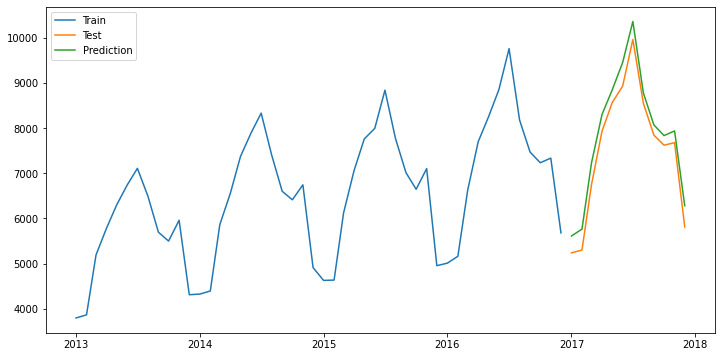

In [51]:
plt.figure(figsize=(12,6))
plt.plot(training, label='Train')
plt.plot(test, label='Test')
plt.plot(auto_pred, label='Prediction')
plt.legend()
plt.show()

- SARIMA가 ARIMA보다 더 높은 정확도임을 확인 할 수 있다.

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2 = r2_score(test, auto_pred)
rmse = mean_squared_error(test, auto_pred)**0.5
print(f'r2_score : {r2}, RMSE : {rmse}')

r2_score : 0.9305467069431359, RMSE : 373.2064254331493


- SARIMA : r2_score : 0.9305467069431359, RMSE : 373.2064254331493
- ARIMA : r2_score : 0.356239503120801, RMSE : 1136.226340284618
- 시계열 분석에서 추세 판단을 하는데는 ARIMA 모형이 정확도가 높을 수 있으나
- SARIMA가 계절성을 보이는 데이터의 경우 더 높은 정확도를 보인다.
- 그러나 SARIMA의 데이터 변수는 잘 선택해 주어야 한다.